In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read the data

soi = pd.read_csv('soi.csv')
soi.describe()

,soi
count,1891.000000
mean,-0.043353
std,1.133221
min,-4.340000
25%,-0.780000
50%,-0.020000
75%,0.750000
max,4.070000


# 1. Plot the SOI Time Series
Create a line plot of the El Niño 3.4 sea surface temperature over time. Use appropriate labels and a clear title for the plot.

In [5]:
#TODO Roger

# 2. Check for Stationarity
Examine the time series graphically to determine if it is stationary. Discuss any observable features of the series.

In [6]:
#TODO Jackson

# 3. Autocorrelation and Partial Autocorrelation
Compute and plot the autocorrelation and partial autocorrelation functions for the SOI time series. Discuss any significant lags.

In [7]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf

# Read data
df = pd.read_csv('soi.csv')
time_series = df['soi']

# Compute the autocorrelation values using acf
# fft=True uses the FFT method to calculate the ACF, which is faster for large data sets.
autocorrelation_values = acf(time_series, fft=True)

# Compute the partial autocorrelation values using pacf
# The method can be 'ywunbiased' (Yule-Walker), 'ywmle' (Yule-Walker without bias correction),
# 'ols' (Ordinary Least Squares), or 'ld' (Levinson-Durbin).
partial_autocorrelation_values = pacf(time_series, method='ywm')

# Print the results
print("Autocorrelation Values:\n", autocorrelation_values)
print("Partial Autocorrelation Values:\n", partial_autocorrelation_values)


Autocorrelation Values:
 [ 1.          0.59613852  0.49886345  0.43164739  0.38384786  0.33243036
  0.29104274  0.23720813  0.20361633  0.16623001  0.10160019  0.04510102
  0.027809   -0.03164769 -0.08482638 -0.11186089 -0.09145059 -0.08446238
 -0.10908677 -0.12333288 -0.1076037  -0.09463945 -0.08156143 -0.08170341
 -0.10624255 -0.06305629 -0.06334102 -0.03246728 -0.00965525 -0.02095627
 -0.03305569 -0.03087295 -0.03697704]
Partial Autocorrelation Values:
 [ 1.          0.59613852  0.22258474  0.1105944   0.07109839  0.02709865
  0.01653323 -0.02011915 -0.00250634 -0.01409731 -0.06791005 -0.0671351
 -0.00709699 -0.072499   -0.07606728 -0.0362824   0.04549948  0.03240089
 -0.02758957 -0.01881787  0.02375514  0.01806625  0.01867489 -0.00404344
 -0.06209804  0.03840375 -0.01412781  0.03587897  0.02116211 -0.04288385
 -0.03704962 -0.01020209 -0.0221508 ]


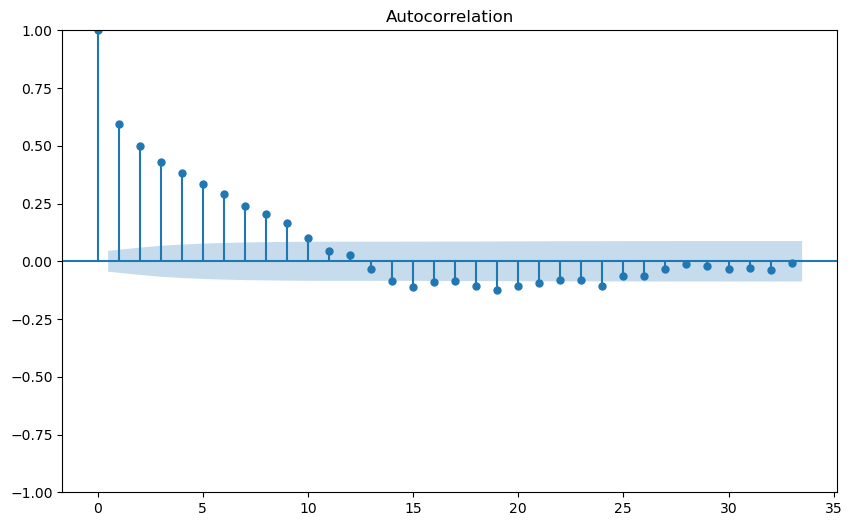

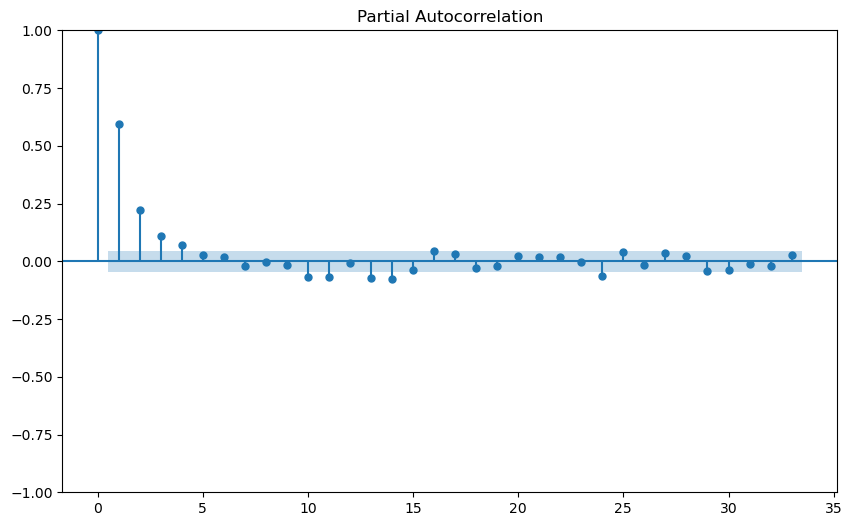

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the correlogram / Autocorrelation plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(time_series, ax=ax)
plt.show()

# Plotting the Partial Autocorrelation plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(time_series, ax=ax, method='ywm')
plt.show()


### Analysis of the Results

- **Autocorrelation Values:**  
  The autocorrelation values decrease gradually, which suggests an AutoRegressive (AR) process.

- **Partial Autocorrelation Values:**  
  The Partial Autocorrelation Values shows a significant initial lag, then drops to lower values that oscillate around zero. The significant initial value followed by a decrease also suggests an AR component.

#### Interpretation and Model Suggestion

> The significant value at the first lag in Partial Autocorrelation Values and the gradual decay in Autocorrelation Values suggest an AR process.

**AR (AutoRegressive) Process:**  
The correlogram analysis points toward an AR process. The gradual decay in Autocorrelation Values and the initial significant value in Partial Autocorrelation Values support the presence of an AR component. However, the exact order of the AR process is not clearly indicated by a sharp cutoff in the Partial Autocorrelation Values; four lags seem to be significant, but the third and fourth ones are pretty close to the uncorrelated zone. Because of this, an AR(2) or AR(1) appears to be a better first approach.

**MA (Moving Average) Component:**  
The absence of a sharp cutoff in the Autocorrelation Values and the fluctuating but generally insignificant values in the Partial Autocorrelation Values after the first few lags suggest that a pure Moving Average (MA) process is less likely to be the sole component.

**ARIMA:**  
Given the gradual decay in Autocorrelation Values and the significant initial lag in PACF, an ARIMA model might be appropriate too.



# 4. Prediction
Divide the dataset into training and testing sets, reserving 30% of the total data for testing. Use the training set to build a time series prediction model. You are free to choose an appropriate model (e.g., ARIMA, SARIMA). Provide a plot comparing the actual values with the predicted values on the testing set.

In [56]:
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('soi.csv')
time_series = df['soi']
Ytrain = time_series[:1323]
Ytest = time_series[1323:]

# Adjusted function to estimate and forecast using ARIMA model
def estimate_and_forecast(order, Ytrain, Ytest):
    model = ARIMA(Ytrain, order=order)
    model_fit = model.fit()
    print(model_fit.summary())
    forecast = model_fit.forecast(steps=len(Ytest))
    mse = np.mean((Ytest - forecast) ** 2)
    print(f'ARIMA{order}, MSE: {mse}')
    return mse


In [57]:
estimate_and_forecast((1,0,0), Ytrain, Ytest)
estimate_and_forecast((2,0,0), Ytrain, Ytest)
estimate_and_forecast((3,0,0), Ytrain, Ytest)
estimate_and_forecast((4,0,0), Ytrain, Ytest)
estimate_and_forecast((5,0,0), Ytrain, Ytest)

                               SARIMAX Results                                
Dep. Variable:                    soi   No. Observations:                 1323
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1767.056
Date:                Wed, 14 Feb 2024   AIC                           3540.112
Time:                        23:40:44   BIC                           3555.675
Sample:                             0   HQIC                          3545.946
                               - 1323                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0243      0.060      0.404      0.686      -0.094       0.142
ar.L1          0.5788      0.022     26.642      0.000       0.536       0.621
sigma2         0.8463      0.026     32.050      0.0

1.3409823313998497

Según lo sugerido en el análisis anterior se prueba cuán bien SOI se puede representar con un modelo $AR(i)$ con $i = 1,...,5$. Los resultados indican que cada componente del ajuste de los modelos $AR(i=1,2,3,4)$ son significativos estadísticamente. Sin embargo para el modelo $AR(5)$, existe una componente que no lo es. Se está usando un nivel de significancia del $5\%$.

Aparentemente los 4 modelos ajustan bastante bien los datos. Y el MSE se encuentra muy cercano a $1.33$ aproximadamente. Sin embargo cuando comparamos por el criterio AIC, el $AR(4)$ es el de menor valor. Por este motivo podemos optar por este modelo.

In [58]:
estimate_and_forecast((0,0,1), Ytrain, Ytest)
estimate_and_forecast((0,0,2), Ytrain, Ytest)
estimate_and_forecast((0,0,3), Ytrain, Ytest)
estimate_and_forecast((0,0,4), Ytrain, Ytest)
estimate_and_forecast((0,0,5), Ytrain, Ytest)
estimate_and_forecast((0,0,6), Ytrain, Ytest)
estimate_and_forecast((0,0,7), Ytrain, Ytest)
estimate_and_forecast((0,0,8), Ytrain, Ytest)
estimate_and_forecast((0,0,9), Ytrain, Ytest)
estimate_and_forecast((0,0,10), Ytrain, Ytest)
estimate_and_forecast((0,0,11), Ytrain, Ytest)

                               SARIMAX Results                                
Dep. Variable:                    soi   No. Observations:                 1323
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1864.695
Date:                Wed, 14 Feb 2024   AIC                           3735.390
Time:                        23:43:34   BIC                           3750.953
Sample:                             0   HQIC                          3741.224
                               - 1323                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0237      0.039      0.612      0.541      -0.052       0.100
ma.L1          0.4218      0.024     17.257      0.000       0.374       0.470
sigma2         0.9810      0.032     30.291      0.0

1.3295131792117096

Al realizar un proceso similar al anterior con el modelo $MA(i)$ con $i=1,...,11$, se tiene que el mejor indicador de AIC es del modelo $MA(11)$ y todas sus componentes son significantes estadísticamente. Además el MSE de la predicción se encuentra cerca de $1.32$.

In [62]:
estimate_and_forecast((4,0,11), Ytrain, Ytest)
estimate_and_forecast((4,0,4), Ytrain, Ytest)
estimate_and_forecast((4,0,5), Ytrain, Ytest)

/home/lachi/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    soi   No. Observations:                 1323
Model:                ARIMA(4, 0, 11)   Log Likelihood               -1706.255
Date:                Wed, 14 Feb 2024   AIC                           3446.510
Time:                        23:50:22   BIC                           3534.700
Sample:                             0   HQIC                          3479.571
                               - 1323                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0272      0.092      0.296      0.767      -0.153       0.207
ar.L1          1.9173      0.112     17.150      0.000       1.698       2.136
ar.L2         -2.0807      0.174    -11.935      0.0

/home/lachi/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    soi   No. Observations:                 1323
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1716.055
Date:                Wed, 14 Feb 2024   AIC                           3452.110
Time:                        23:50:25   BIC                           3503.986
Sample:                             0   HQIC                          3471.557
                               - 1323                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0117      0.073     -0.161      0.872      -0.154       0.131
ar.L1          1.3438      0.159      8.443      0.000       1.032       1.656
ar.L2          0.4872      0.152      3.214      0.0

/home/lachi/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1.3209374976158572

Finalmente cuando unimos los modelos $AR(4)$ con $MA(11)$ se obtiene un modelo $ARMA(4,11)$ con un buen índice del criterio AIC, pero con 7 componentes de media móvil de no significativas. Para corregir esto se prueban los modelos $ARMA(4, 4)$ y $ARMA(4, 5)$, donde este último tiene un AIC aceptable con todas sus componentes significativas estadísticamente.

Comparando los mejores modelos se obtiene:

| Modelo | AIC | BIC | MSE |  
|----|----|----|----|  
| $AR(4)$ | 3471.394| 3502.520 | 1.3385 |  
| $MA(11)$ | 3473.776| 3541.216 | 1.3295 |  
| $ARMA(4,5)$ | 3454.668 | 3511.732 | 1.3209 |  

Graficando los tres modelos se obtiene: